In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Dataset: Congressional Voting Records
Taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [2]:
names = ['party', 'infants', 'water', 'budget', 
         'physician', 'salvador', 'relgious', 'satellite', 
         'aid', 'missile', 'immigration', 'synfuels', 
         'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                   names=names, na_values='?')

# Data Pre-processing

In [3]:
_data = data.copy()

## Missing Data Imputation
Here, missing values are imputed with the median along the columns

In [4]:
for column in range(1, _data.shape[1]):
    _data.iloc[:, column] = _data.iloc[:, column].map({'y': 1, 'n': 0})
    
_data.tail(15)

,party,infants,water,budget,physician,salvador,relgious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
420,republican,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
421,democrat,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
422,democrat,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
423,democrat,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
424,democrat,0.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,1.0
425,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
426,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
427,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
428,democrat,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
429,democrat,1.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0


In [5]:
_data.describe(include='all')

,party,infants,water,budget,physician,salvador,relgious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,NaN,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   party              435 non-null    object 
 1   infants            423 non-null    float64
 2   water              387 non-null    float64
 3   budget             424 non-null    float64
 4   physician          424 non-null    float64
 5   salvador           420 non-null    float64
 6   relgious           424 non-null    float64
 7   satellite          421 non-null    float64
 8   aid                420 non-null    float64
 9   missile            413 non-null    float64
 10  immigration        428 non-null    float64
 11  synfuels           414 non-null    float64
 12  education          404 non-null    float64
 13  superfund          410 non-null    float64
 14  crime              418 non-null    float64
 15  duty_free_exports  407 non-null    float64
 16  eaa_rsa            331 non

In [7]:
_data.iloc[:, 1:] = _data.iloc[:, 1:].apply(lambda df: df.fillna(df.median())).astype(np.int)

In [9]:
data_prepped = _data.copy()

# Visual EDA

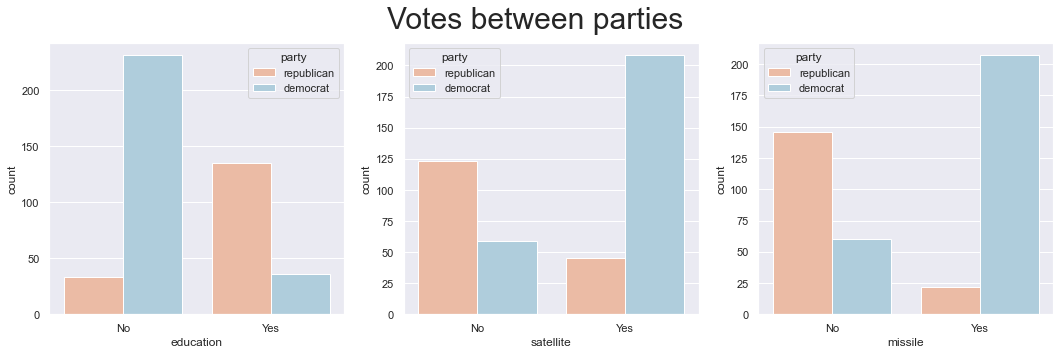

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(18, 5))

sns.countplot(x='education',
             hue='party',
             data=data_prepped,
             palette='RdBu',
             ax=ax1)

sns.countplot(x='satellite',
             hue='party',
             data=data_prepped,
             palette='RdBu',
             ax=ax2)

sns.countplot(x='missile',
             hue='party',
             data=data_prepped,
             palette='RdBu',
             ax=ax3)

fig.suptitle('Votes between parties',
            fontsize=30)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['No', 'Yes'])
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['No', 'Yes'])
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['No', 'Yes'])

plt.show()

# Classification via k-NN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Features/Inputs
inputs = data_prepped.drop(columns=['party']).to_numpy()

# Targets/Outputs
output = data_prepped['party'].to_numpy()

In [32]:
print(inputs.shape)
print(output.shape)

(435, 16)
(435,)


In [36]:
# Initiate kNN
knn = KNeighborsClassifier(6)

# Train
knn.fit(inputs, output)

KNeighborsClassifier(n_neighbors=6)

In [37]:
# Evaluate on training data (for now)
output_pred = knn.predict(inputs)

In [48]:
# Testing on a random input
test = np.array([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 
        0.423106, 0.980764, 0.68483, 0.480932, 0.392118,
        0.343178, 0.72905, 0.438572, 0.059678, 0.398044, 0.737995]).reshape(1,-1)

test_pred = knn.predict(test)

In [49]:
# Evaluation on training (for now)
knn.score(inputs, output)

0.9471264367816092